In [19]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier  # type: ignore
import matplotlib.pyplot as plt

df=pd.read_csv('Cardiovascular_Disease_Dataset.csv')
df.head(10)

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,Heart Disease
0,103368,53,Male,non-anginal pain,171,0,False,1,147,no,5.3,downsloping,3,Presence
1,119250,40,Male,typical angina,94,229,False,1,115,no,3.7,upsloping,1,Absence
2,119372,49,Male,non-anginal pain,133,142,False,0,202,yes,5.0,upsloping,0,Absence
3,132514,43,Male,typical angina,138,295,True,1,153,no,3.2,flat,2,Presence
4,146211,31,Male,atypical angina,199,0,False,2,136,no,5.3,downsloping,2,Presence
5,148462,24,Male,atypical angina,173,0,False,0,161,no,4.7,downsloping,2,Presence
6,168686,79,Male,non-anginal pain,130,240,False,2,157,no,2.5,flat,1,Presence
7,170498,52,Male,typical angina,127,345,False,0,192,yes,4.9,upsloping,0,Absence
8,188225,62,Male,typical angina,121,357,False,1,138,no,2.8,none,0,Absence
9,192523,61,Female,typical angina,190,181,False,1,150,no,2.9,flat,0,Presence


In [20]:
x=df.drop(['Heart Disease', 'patientid'],axis='columns')
y=df['Heart Disease']
x.head()

,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels
0,53,Male,non-anginal pain,171,0,False,1,147,no,5.3,downsloping,3
1,40,Male,typical angina,94,229,False,1,115,no,3.7,upsloping,1
2,49,Male,non-anginal pain,133,142,False,0,202,yes,5.0,upsloping,0
3,43,Male,typical angina,138,295,True,1,153,no,3.2,flat,2
4,31,Male,atypical angina,199,0,False,2,136,no,5.3,downsloping,2


In [21]:
Le_gender=LabelEncoder()
Le_chestpain=LabelEncoder()
Le_fastingbloodsugar=LabelEncoder()
Le_exercise_Angina=LabelEncoder()
Le_slope=LabelEncoder()

x['Le_gender']=Le_gender.fit_transform(x['gender'])
x['Le_chestpain']=Le_chestpain.fit_transform(x['chestpain'])
x['Le_fastingbloodsugar']=Le_fastingbloodsugar.fit_transform(x['fastingbloodsugar'])
x['Le_exercise_angia']=Le_exercise_Angina.fit_transform(x['exerciseangia'])
x['Le_slope']=Le_slope.fit_transform(x['slope'])

x.head()

,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,Le_gender,Le_chestpain,Le_fastingbloodsugar,Le_exercise_angia,Le_slope
0,53,Male,non-anginal pain,171,0,False,1,147,no,5.3,downsloping,3,1,2,0,0,0
1,40,Male,typical angina,94,229,False,1,115,no,3.7,upsloping,1,1,3,0,0,3
2,49,Male,non-anginal pain,133,142,False,0,202,yes,5.0,upsloping,0,1,2,0,1,3
3,43,Male,typical angina,138,295,True,1,153,no,3.2,flat,2,1,3,1,0,1
4,31,Male,atypical angina,199,0,False,2,136,no,5.3,downsloping,2,1,1,0,0,0


In [22]:
x_input=x.drop(['gender', 'fastingbloodsugar', 'exerciseangia', 'slope', 'chestpain'],axis='columns')
#y = y.drop(['Heart Disease'],axis='columns')
x_input.head()


,age,restingBP,serumcholestrol,restingrelectro,maxheartrate,oldpeak,noofmajorvessels,Le_gender,Le_chestpain,Le_fastingbloodsugar,Le_exercise_angia,Le_slope
0,53,171,0,1,147,5.3,3,1,2,0,0,0
1,40,94,229,1,115,3.7,1,1,3,0,0,3
2,49,133,142,0,202,5.0,0,1,2,0,1,3
3,43,138,295,1,153,3.2,2,1,3,1,0,1
4,31,199,0,2,136,5.3,2,1,1,0,0,0


In [23]:
x_input_train,x_input_test,y_train,y_test=train_test_split(x_input,y,test_size=0.3,random_state=42)
len(x_input_train)
len(x_input_test)

300

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_input_train)
X_test_scaled = scaler.transform(x_input_test)

KNN=KNeighborsClassifier(n_neighbors=11)
KNN.fit(X_train_scaled,y_train)


KNeighborsClassifier(n_neighbors=11)

In [25]:
scores_dict = ['','','','']

scores_dict[0] = KNN.score(X_test_scaled,y_test)*100
KNN.score(X_test_scaled,y_test)


0.9633333333333334

In [26]:
y_pred1=KNN.predict(X_test_scaled)
print('Predictioned Values',y_pred1)

Predictioned Values ['Presence' 'Absence' 'Absence' 'Absence' 'Presence' 'Absence' 'Absence'
 'Absence' 'Presence' 'Presence' 'Absence' 'Presence' 'Presence'
 'Presence' 'Presence' 'Presence' 'Presence' 'Presence' 'Absence'
 'Presence' 'Presence' 'Presence' 'Absence' 'Absence' 'Absence' 'Presence'
 'Absence' 'Presence' 'Absence' 'Absence' 'Presence' 'Absence' 'Presence'
 'Presence' 'Presence' 'Presence' 'Presence' 'Absence' 'Absence' 'Absence'
 'Absence' 'Presence' 'Absence' 'Presence' 'Absence' 'Absence' 'Absence'
 'Presence' 'Absence' 'Presence' 'Absence' 'Presence' 'Presence' 'Absence'
 'Presence' 'Absence' 'Presence' 'Presence' 'Presence' 'Absence' 'Absence'
 'Presence' 'Absence' 'Presence' 'Absence' 'Absence' 'Presence' 'Presence'
 'Presence' 'Absence' 'Absence' 'Presence' 'Presence' 'Presence' 'Absence'
 'Presence' 'Presence' 'Absence' 'Presence' 'Absence' 'Presence'
 'Presence' 'Absence' 'Presence' 'Absence' 'Presence' 'Presence' 'Absence'
 'Absence' 'Presence' 'Absence' 'Presen

Accuracy: 0.9633333333333334 
Precision:  0.9808917197452229


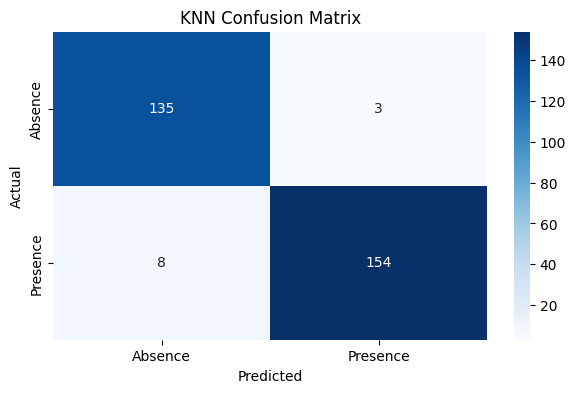

In [54]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
import seaborn as sns

print('Accuracy:', accuracy_score(y_test, y_pred1), '\nPrecision: ', precision_score(y_test, y_pred1, pos_label='Presence'))
cm_knn = confusion_matrix(y_test, y_pred1)
plt.figure(figsize=(7, 4))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', xticklabels=['Absence', 'Presence'], yticklabels=['Absence', 'Presence'])
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [28]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

decisiontree=DecisionTreeClassifier()
decisiontree.fit(X_train_scaled,y_train)


DecisionTreeClassifier()

In [29]:
scores_dict[1] = decisiontree.score(X_test_scaled,y_test)*100

decisiontree.score(X_test_scaled,y_test)

0.9633333333333334

In [30]:
y_pred2=decisiontree.predict(X_test_scaled)
print(y_pred2)

['Presence' 'Absence' 'Absence' 'Absence' 'Presence' 'Absence' 'Absence'
 'Presence' 'Presence' 'Presence' 'Absence' 'Presence' 'Presence'
 'Presence' 'Presence' 'Presence' 'Presence' 'Presence' 'Absence'
 'Presence' 'Presence' 'Presence' 'Absence' 'Absence' 'Absence' 'Presence'
 'Absence' 'Presence' 'Absence' 'Absence' 'Presence' 'Absence' 'Presence'
 'Presence' 'Presence' 'Presence' 'Presence' 'Absence' 'Presence'
 'Absence' 'Absence' 'Presence' 'Absence' 'Presence' 'Absence' 'Absence'
 'Presence' 'Presence' 'Presence' 'Presence' 'Absence' 'Presence'
 'Presence' 'Absence' 'Presence' 'Absence' 'Absence' 'Presence' 'Presence'
 'Absence' 'Absence' 'Presence' 'Absence' 'Presence' 'Absence' 'Absence'
 'Presence' 'Presence' 'Presence' 'Absence' 'Absence' 'Presence'
 'Presence' 'Presence' 'Absence' 'Presence' 'Presence' 'Absence'
 'Presence' 'Absence' 'Presence' 'Presence' 'Absence' 'Presence' 'Absence'
 'Presence' 'Presence' 'Absence' 'Absence' 'Presence' 'Absence' 'Presence'
 'Absence' 'A

Accuracy: 0.9633333333333334 
Precision:  0.9575757575757575


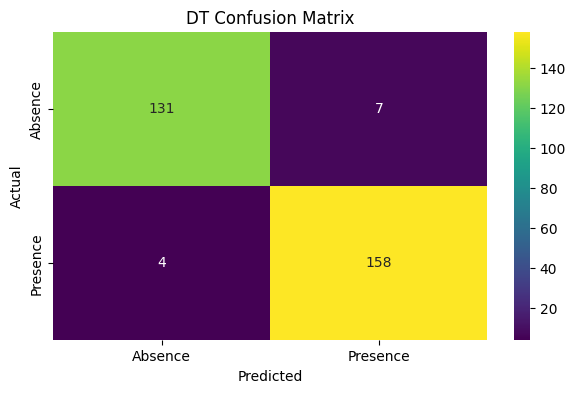

In [55]:
print('Accuracy:', accuracy_score(y_test, y_pred2), '\nPrecision: ', precision_score(y_test, y_pred2, pos_label='Presence'))
cm_dt = confusion_matrix(y_test, y_pred2)
plt.figure(figsize=(7, 4))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='viridis', xticklabels=['Absence', 'Presence'], yticklabels=['Absence', 'Presence'])
plt.title('DT Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [32]:
# SVM (Support Vector Machine)
from sklearn.svm import SVC

svm = SVC()

svm.fit(X_train_scaled, y_train)

SVC()

In [33]:
scores_dict[2] = svm.score(X_test_scaled, y_test)*100

svm.score(X_test_scaled, y_test)

0.9733333333333334

In [34]:
y_pred3 = svm.predict(X_test_scaled)
print(y_pred3)

['Presence' 'Absence' 'Absence' 'Absence' 'Presence' 'Absence' 'Absence'
 'Absence' 'Presence' 'Presence' 'Absence' 'Presence' 'Presence'
 'Presence' 'Presence' 'Presence' 'Presence' 'Presence' 'Absence'
 'Presence' 'Presence' 'Presence' 'Absence' 'Absence' 'Absence' 'Presence'
 'Absence' 'Presence' 'Absence' 'Absence' 'Presence' 'Absence' 'Presence'
 'Presence' 'Presence' 'Presence' 'Presence' 'Absence' 'Presence'
 'Absence' 'Absence' 'Presence' 'Absence' 'Presence' 'Absence' 'Absence'
 'Absence' 'Presence' 'Absence' 'Presence' 'Absence' 'Presence' 'Presence'
 'Absence' 'Presence' 'Absence' 'Absence' 'Presence' 'Presence' 'Absence'
 'Absence' 'Presence' 'Absence' 'Presence' 'Absence' 'Absence' 'Presence'
 'Presence' 'Presence' 'Absence' 'Absence' 'Presence' 'Presence'
 'Presence' 'Absence' 'Presence' 'Presence' 'Absence' 'Presence' 'Absence'
 'Presence' 'Presence' 'Absence' 'Presence' 'Absence' 'Presence'
 'Presence' 'Absence' 'Absence' 'Presence' 'Absence' 'Presence' 'Absence'
 'Abse

Accuracy: 0.9733333333333334 
Precision:  0.9935897435897436


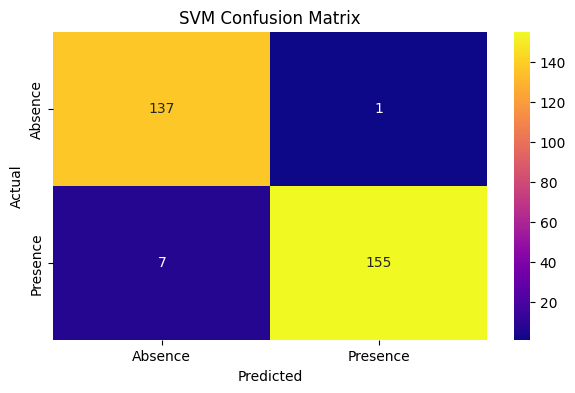

In [56]:
print('Accuracy:', accuracy_score(y_test, y_pred3), '\nPrecision: ', precision_score(y_test, y_pred3, pos_label='Presence'))
cm_svm = confusion_matrix(y_test, y_pred3)
plt.figure(figsize=(7, 4))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='plasma', xticklabels=['Absence', 'Presence'], yticklabels=['Absence', 'Presence'])
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [36]:
#Gradient Boosting

from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators=300, learning_rate=0.05, random_state=100, max_features=5)

gbc.fit(X_train_scaled, y_train)


GradientBoostingClassifier(learning_rate=0.05, max_features=5, n_estimators=300,
                           random_state=100)

In [37]:
scores_dict[3] = gbc.score(X_test_scaled, y_test)*100

gbc.score(X_test_scaled, y_test)

0.9833333333333333

In [38]:
y_pred4 = gbc.predict(X_test_scaled)
print(y_pred4)

['Presence' 'Absence' 'Absence' 'Absence' 'Presence' 'Absence' 'Absence'
 'Presence' 'Presence' 'Presence' 'Absence' 'Presence' 'Presence'
 'Presence' 'Presence' 'Presence' 'Presence' 'Presence' 'Absence'
 'Presence' 'Presence' 'Presence' 'Absence' 'Absence' 'Absence' 'Presence'
 'Absence' 'Presence' 'Absence' 'Absence' 'Presence' 'Absence' 'Presence'
 'Presence' 'Presence' 'Presence' 'Presence' 'Absence' 'Presence'
 'Absence' 'Absence' 'Presence' 'Absence' 'Presence' 'Absence' 'Absence'
 'Absence' 'Presence' 'Presence' 'Presence' 'Absence' 'Presence'
 'Presence' 'Absence' 'Presence' 'Absence' 'Absence' 'Presence' 'Presence'
 'Absence' 'Absence' 'Presence' 'Absence' 'Presence' 'Absence' 'Absence'
 'Presence' 'Presence' 'Presence' 'Absence' 'Absence' 'Presence'
 'Presence' 'Presence' 'Absence' 'Presence' 'Presence' 'Absence'
 'Presence' 'Absence' 'Presence' 'Presence' 'Absence' 'Presence' 'Absence'
 'Presence' 'Presence' 'Absence' 'Absence' 'Presence' 'Absence' 'Presence'
 'Absence' 'Ab

Accuracy: 0.9833333333333333 
Precision:  0.9937106918238994


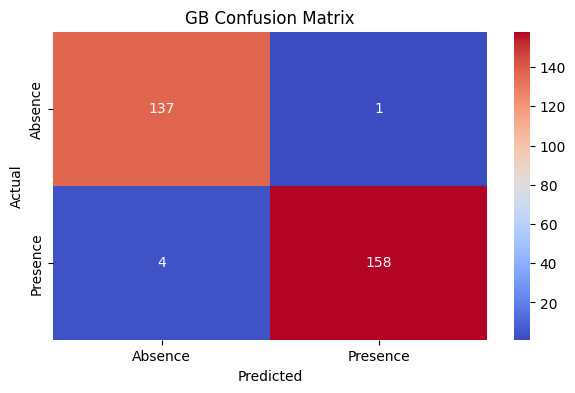

In [57]:
print('Accuracy:', accuracy_score(y_test, y_pred4), '\nPrecision: ', precision_score(y_test, y_pred4, pos_label='Presence'))
cm_gb = confusion_matrix(y_test, y_pred4)
plt.figure(figsize=(7, 4))
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='coolwarm', xticklabels=['Absence', 'Presence'], yticklabels=['Absence', 'Presence'])
plt.title('GB Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

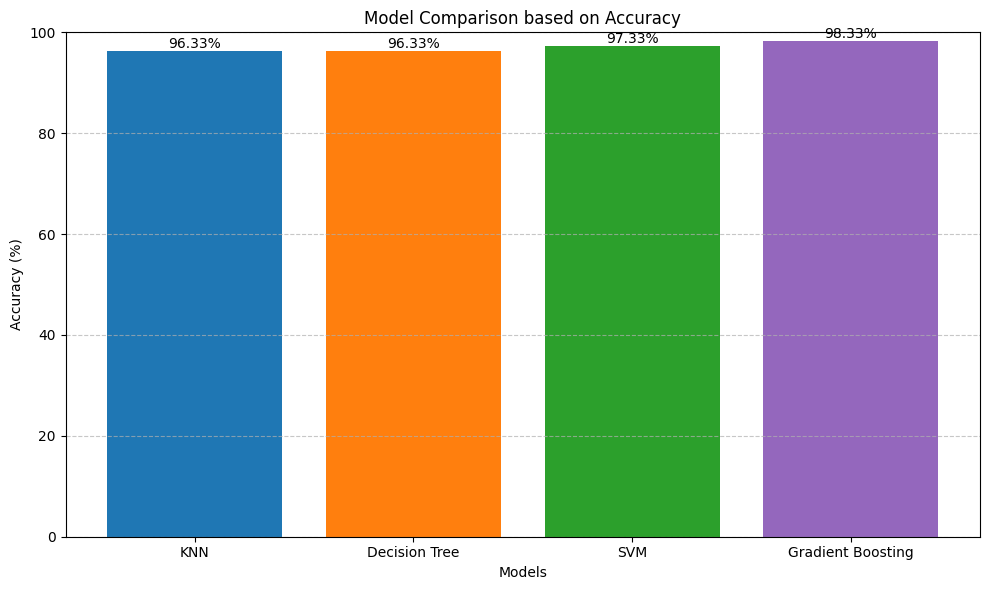

In [40]:
models = ['KNN', 'Decision Tree', 'SVM', 'Gradient Boosting']

plt.figure(figsize=(10, 6))

bars = plt.bar(models, scores_dict, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#9467bd'])

plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Model Comparison based on Accuracy')
plt.ylim([0, 100])

for bar, accuracy in zip(bars, scores_dict):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{accuracy:.2f}%', va='bottom', ha='center', fontsize=10)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()
